# Explore here

Boosting es una composición de modelos (generalmente árboles de decisión) secuencial en la cual el modelo nuevo persigue corregir los errores del anterior. Puede que esta visión nos sea útil en este conjunto de datos, ya que se cumplen varias de las suposiciones estudiadas en el módulo.

En este proyecto te centrarás en esta idea entrenando el conjunto de datos para mejorar el accuracy.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [53]:

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
datacore = data.copy()
data1 = data.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
#datacore = datacore.drop( )
datacore.drop(labels=datacore[datacore["Glucose"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["BloodPressure"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["BMI"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["SkinThickness"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["Insulin"] == 0 ].index, inplace=True)

In [55]:
#from scipy.stats.mstats import winsorize

#datacore['Insulin_winsorized'] = winsorize(datacore['Insulin'], limits=[0.05, 0.05]) 

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define tus variables independientes (X) y dependiente (y)
X = datacore.drop(columns=['Outcome'], axis=1)  # Reemplaza 'columna_objetivo' por el nombre real de la variable objetivo
y = datacore["Outcome"]

# Divide el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Imprimir tamaños resultantes
print('Tamaño set de entrenamiento: ', X_train.shape, y_train.shape)
print('Tamaño set de prueba: ', X_test.shape, y_test.shape)

# Distribución de categorías
print('Distribución de categorías dataset original: ', y.value_counts(normalize=True))
print('Distribución de categorías dataset entrenamiento: ', y_train.value_counts(normalize=True))
print('Distribución de categorías dataset prueba: ', y_test.value_counts(normalize=True))

# Muestra las primeras filas del conjunto de entrenamiento
print(datacore["Outcome"].value_counts())
print(X.columns)
 

Tamaño set de entrenamiento:  (313, 8) (313,)
Tamaño set de prueba:  (79, 8) (79,)
Distribución de categorías dataset original:  Outcome
0    0.668367
1    0.331633
Name: proportion, dtype: float64
Distribución de categorías dataset entrenamiento:  Outcome
0    0.667732
1    0.332268
Name: proportion, dtype: float64
Distribución de categorías dataset prueba:  Outcome
0    0.670886
1    0.329114
Name: proportion, dtype: float64
Outcome
0    262
1    130
Name: count, dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [57]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Modelos
model_gb = GradientBoostingClassifier()
model_ada = AdaBoostClassifier()
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Si es clasificación multiclase

# Entrenamiento
model_gb.fit(X_train, y_train)
model_ada.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:45:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [58]:
y_pred_gb = model_gb.predict(X_test)
y_pred_ada = model_ada.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("AdaBoost:\n", classification_report(y_test, y_pred_ada))
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.70      0.62      0.65        26

    accuracy                           0.78        79
   macro avg       0.76      0.74      0.75        79
weighted avg       0.78      0.78      0.78        79

AdaBoost:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.79      0.73      0.76        26

    accuracy                           0.85        79
   macro avg       0.83      0.82      0.82        79
weighted avg       0.85      0.85      0.85        79

XGBoost:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        53
           1       0.69      0.77      0.73        26

    accuracy                           0.81        79
   macro avg       0.78      0.80      0.79        79
weighted avg       0.82      0.81

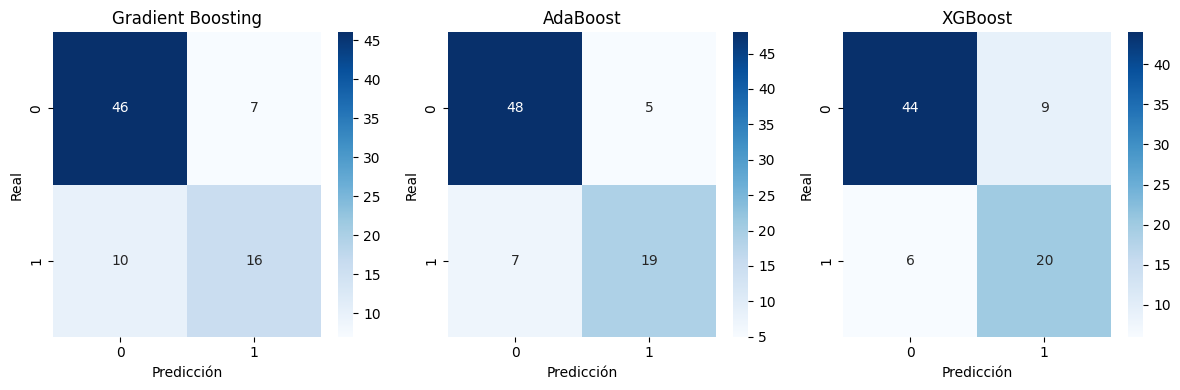

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

modelos = ["Gradient Boosting", "AdaBoost", "XGBoost"]
predicciones = [y_pred_gb, y_pred_ada, y_pred_xgb]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

for ax, nombre, y_pred in zip(axes, modelos, predicciones):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

In [61]:
model.save_model("xgb_classifier_default_42.json")